In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement  = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

In [10]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

<Axes: xlabel='Date', ylabel='mm'>

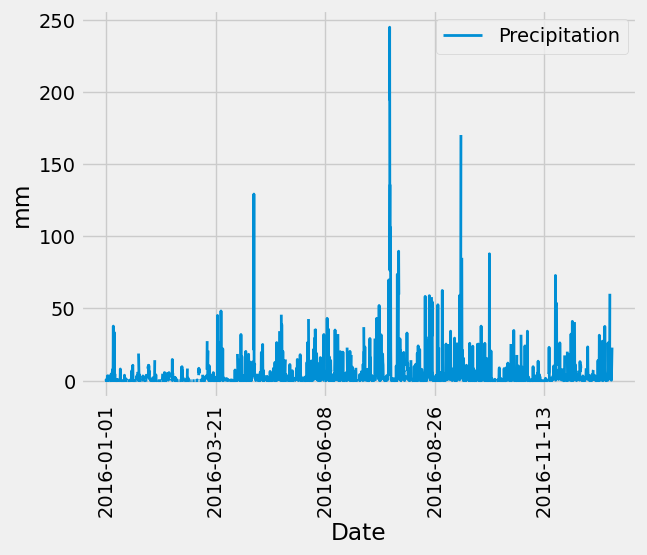

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date
# Perform a query to retrieve the data and precipitation scores

results = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016, 8, 23').\
filter(measurement.date <= '2017, 8, 23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results = pd.DataFrame(results, columns=['Date','Precipitation'])
results.set_index(results['Date'], inplace=True)

# Sort the dataframe by date
sorted = results.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
sorted.plot(ylabel = 'mm', linewidth=2, alpha =1, rot=90, xticks=(0,500,1000,1500,2000))


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data

results.describe()

,Precipitation
count,2069.000000
mean,4.572305
std,12.861915
min,0.000000
25%,0.000000
50%,0.500000
75%,3.800000
max,244.900000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

[(12.2, 29.4, 22.03582251082252)]

Text(0.5, 0, 'Temperature')

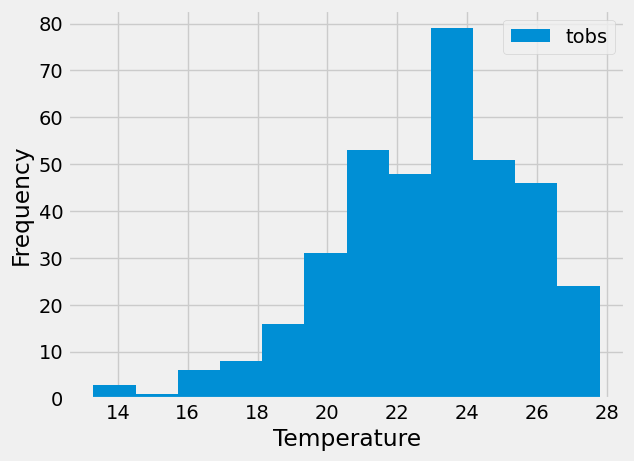

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').\
filter(measurement.date > '2016, 8, 23').filter(measurement.date <= '2017, 8, 23').all()
results_df = pd.DataFrame(results)
#print(results_df)
results_df.plot.hist(ylabel = 'Frequency', bins=12)
plt.xlabel('Temperature')

# Close Session

In [17]:
# Close Session
session.close()

## Flask Task API
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# import Flask
from flask import Flask, jsonify

# engine = create_engine("sqlite:///hawaii.sqlite")
# connect = engine.connect()
# Base2 = automap_base()
# Session.configure(bind=engine) 
# session = Session()


# # reflect the tables
# Base2.prepare(autoload_with=engine)
# measurement_flask  = Base2.classes.measurement
# station_flask = Base2.classes.station


# Home page route
# @app.route("/api/v1.0/hawaii_holiday")
# def hawaii_holiday():
#     session = Session(engine)
#     print("Server received request for 'Start' page...")

In [ ]:
#Create app

app = Flask(__name__)


@app.route("/")

def home():
    print("Server received request for 'Home' page...")
    return ( f"Welcome to the Hawaii Holiday Weather API<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/hawaii_holiday<br/>"
        f"/api/v1.0/hawaii_holiday/precipitation<br/>"
        f"/api/v1.0/hawaii_holiday/station<br/>"
        f"/api/v1.0/hawaii_holiday/tobs<br/>"
        f"/api/v1.0/hawaii_holiday/start<br/>"
        f"/api/v1.0/hawaii_holiday/startend<br/>")


@app.route("/api/v1.0/hawaii_holiday/precipitation")

def about():
    session = Session(engine)
    print("Server received request for 'Precipitation' page...")
    return "Welcome to 'Precipitation'"

    precip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016, 8, 23').\
    filter(measurement.date <= '2017, 8, 23').all()
    session.close()
# make as dict
    precip_d = dict(precip)

    return jsonify(precip_d)


    
if __name__ == "__main__":
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [11/Aug/2023 18:59:37] "GET / HTTP/1.1" 200 -


Server received request for 'Home' page...


127.0.0.1 - - [11/Aug/2023 18:59:47] "GET /api/v1.0/hawaii_holiday/precipitation HTTP/1.1" 200 -


Server received request for 'Precipitation' page...


In [ ]:


# Station Route: jsonified data of all the stations in the database(joined tables here, I feel)


# Tobs Route: returns jsonified data for most active station, only for the last year of data



#API Dynamic ROute:


#start route: accepts start date as a parameter from the url & returns the min, max, ave temps calced from given start date to end of the dataset



###start.end route: accppts the start and end dates from the URL, returns min max and ave for the given start date to given end date


